In [79]:
#importing and preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

data = pd.read_csv(r'C:\Users\Viral Shanker\MLfile.csv')
data.head()
data["constant"] = 1
data = data.drop(columns = ["maxscore"])
data = data.drop(columns = ["age", 'created1.1', 'score1.1', 'age1.1', 'stories1.1', 'ratio1.1', 'coms1.1', 'created2.1', 'score2.1', 'age2.1', 'stories2.1', 'ratio2.1', 'coms2.1', 'created3.1', 'score3.1', 'age3.1', 'stories3.1', 'ratio3.1', 'coms3.1', 'created4.1', 'score4.1', 'age4.1', 'stories4.1', 'ratio4.1', 'coms4.1', 'created5.1', 'score5.1', 'age5.1', 'stories5.1', 'ratio5.1', 'coms5.1'])
data["finalScore"] = data["61selfScore"]
data["success"] = 0
from sklearn.utils import shuffle
#data = shuffle(data)
#getHour and decide whether o not to shuffle
import datetime
def getHourIndex(pers, intercept = 37, slope = 34):
    return(intercept + 34*pers)

threshL = [2000]
thresh = 2000
pers = 6
ind = getHourIndex(pers)

curr = 1
for x in threshL:
    data.loc[data.finalScore > x, "success"] = curr
    curr += 1

##data.loc[data.finalScore > thresh, "success"] = 1
X = data[data.columns[3:ind]]
y = data["finalScore"]
y = data["success"]

In [80]:
X = pd.concat([X, data["created_utc"].apply(lambda s: pd.Series({'day':datetime.datetime.utcfromtimestamp(s).strftime('%a')}))], axis=1)
t = pd.get_dummies(X["day"])
X = X.join(t)
X = X.drop(columns = ["day"])
X = X.apply(pd.to_numeric)

In [81]:
data["success"]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9855    0
9856    0
9857    0
9858    0
9859    0
9860    0
9861    0
9862    0
9863    0
9864    0
9865    0
9866    0
9867    0
9868    0
9869    0
9870    0
9871    0
9872    0
9873    0
9874    0
9875    0
9876    0
9877    0
9878    0
9879    0
9880    0
9881    0
9882    0
9883    0
9884    0
Name: success, Length: 9885, dtype: int64

In [39]:
augX = []
for i, row in enumerate(X.iterrows()):
    #print(i)
    #print(row)
    if (i > 1) and (i < len(X)-2):
        a = []
        a = X.loc[i].tolist()
        a += X.loc[i-1].tolist()
        a += X.loc[i-2].tolist()
        a += X.loc[i+1].tolist()
        a += X.loc[i+2].tolist()
        augX.append(a)
#print(augX[1])
X = augX
y = y[2:len(y)-2]

In [82]:
X = X.apply(lambda x: x/x.max(), axis=0)
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=829)

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
# Fit regression model
params = {'n_estimators': 700, 'max_depth': 2, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'ls', 'verbose': 1, }
params2 = {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 3,
          'learning_rate': 0.1, 'verbose': 1, }
clf = ensemble.GradientBoostingRegressor(**params)
clf = ensemble.GradientBoostingClassifier(**params2)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

      Iter       Train Loss   Remaining Time 
         1           0.0529            4.54s
         2           0.0503            3.86s
         3           0.0482            3.55s
         4           0.0464            3.42s
         5           0.0450            3.32s
         6           0.0434            3.25s
         7           0.0422            3.19s
         8           0.0412            3.14s
         9           0.0404            3.09s
        10           0.0394            3.03s
        20           0.0261            2.64s
        30           0.0210            2.30s
        40           0.0180            1.97s
        50           0.0160            1.66s
        60           0.0134            1.32s
        70           0.0120            0.99s
        80           0.0108            0.66s
        90           0.0101            0.34s
       100           0.0097            0.00s
MSE: 0.0044


ValueError: x and y must have same first dimension, but have shapes (700,) and (100,)

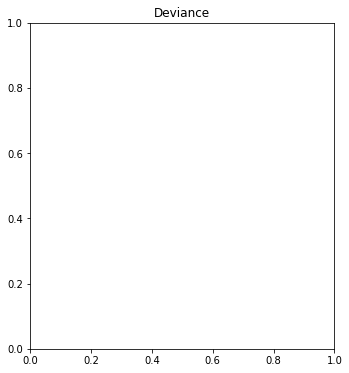

In [85]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

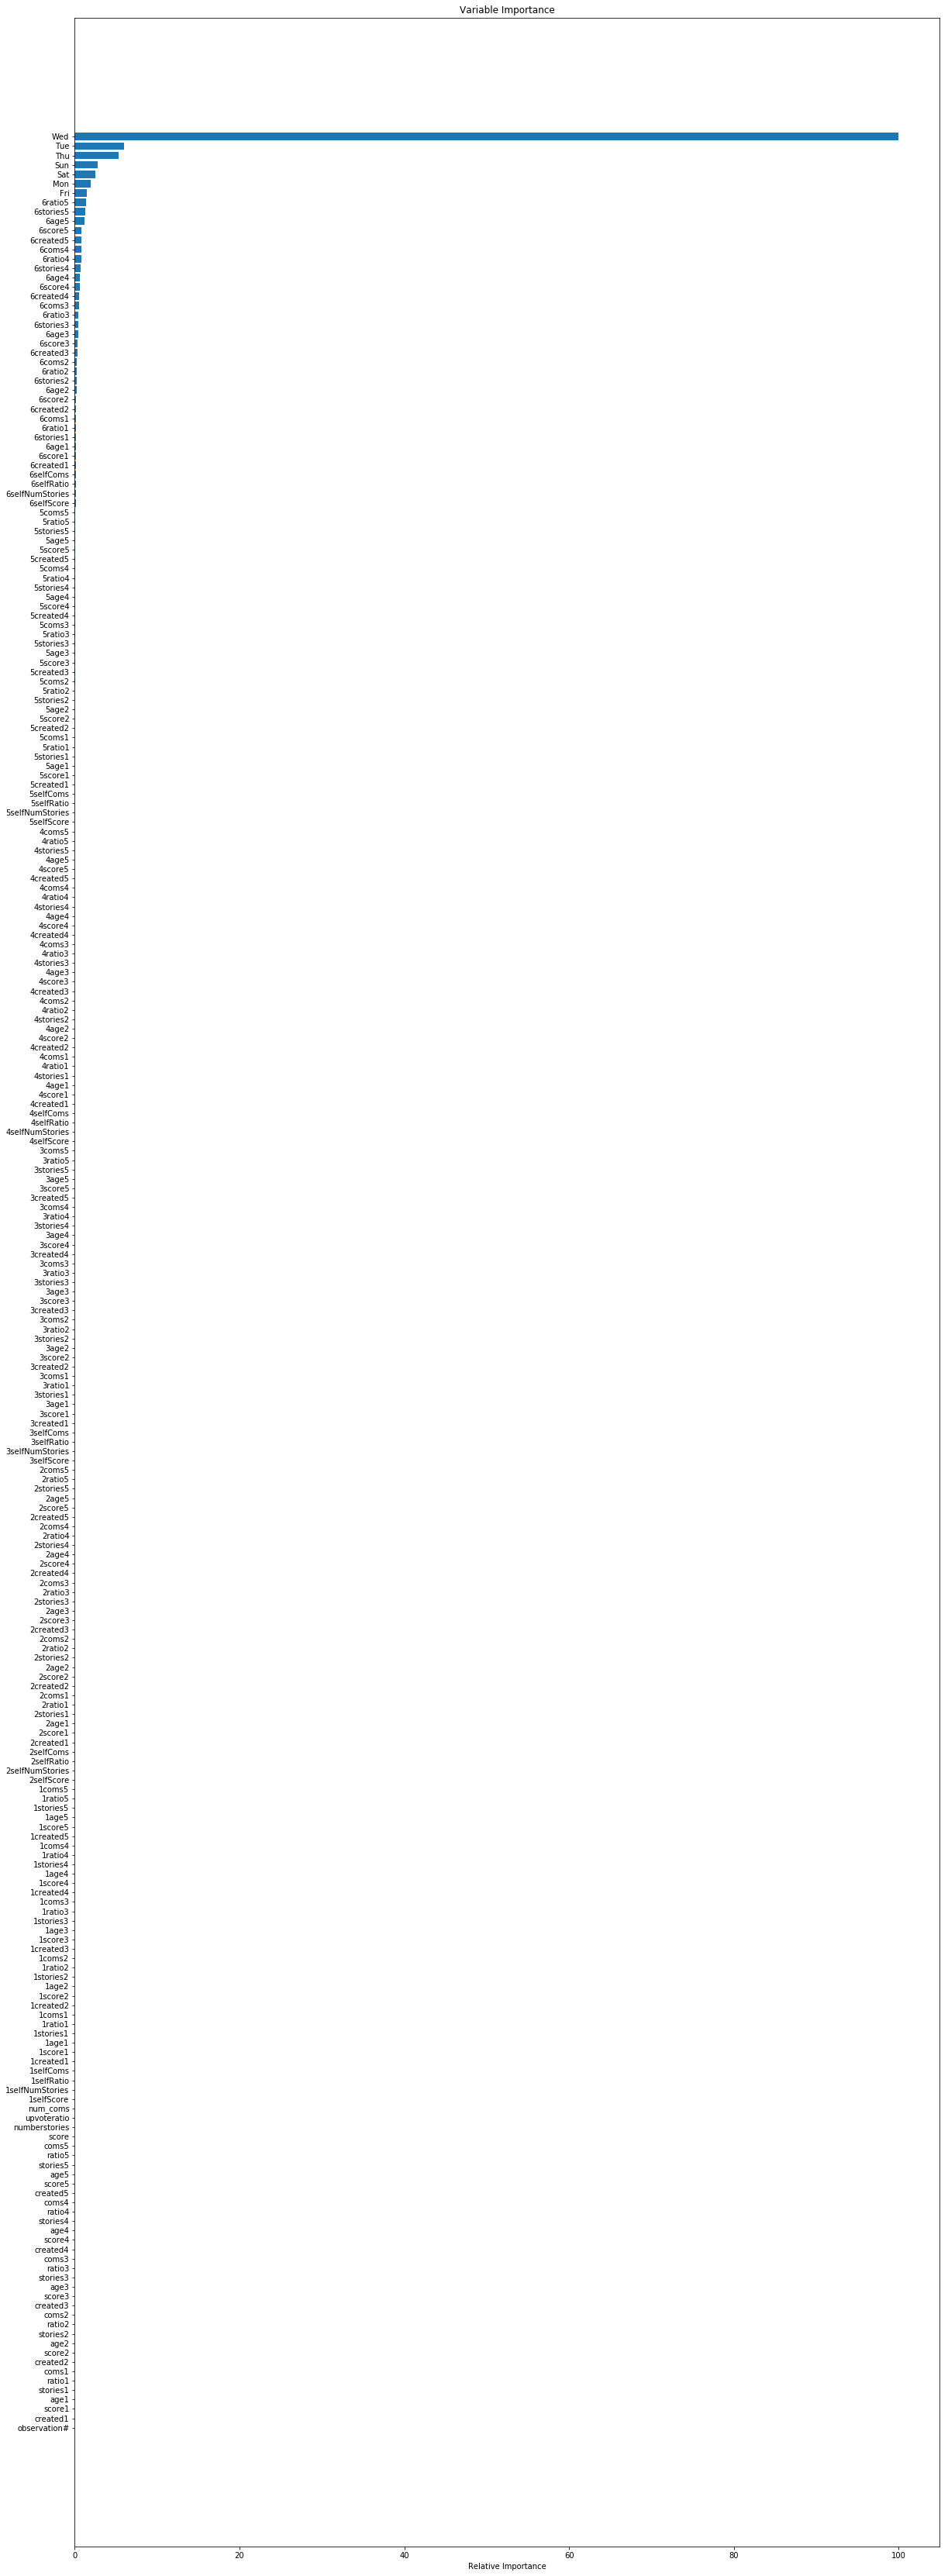

In [8]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20, 60))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [86]:
#Our generalized regression testing 

def generalTest(reg, thresh, trainX, trainy, testX, testy):
    reg.fit(trainX, trainy)
    print("The Score is: ", reg.score(testX, testy))
    a = np.where(testy > thresh)[0].tolist()
    preds = reg.predict(testX)
    p = np.where(preds > thresh)[0].tolist()
    print(a)
    print(p)
    c = 0
    i = 0
    m = 0
    for e in p:
        if e not in a:
            print("Incorrect Prediction", e, "actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
            i += 1
        else:
            print("Correct Prediction", e ,"actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
            c += 1
    for e in a:
        if e not in p:
            print("Missed Prediction", e, "actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
            m += 1
    print("Correct:", c)
    print("Inorrect:", i)
    print("Missed:", m)
    
def generalClassTest(reg, threshL, trainX, trainy, testX, testy):
    reg.fit(trainX, trainy)
    print("The Score is: ", reg.score(testX, testy))
    for i,x in enumerate(threshL):
        print("*****************************")
        print("Class", i)
        a = np.where(testy == i)[0].tolist()
        preds = reg.predict(testX)
        p = np.where(preds == i)[0].tolist()
        print(a)
        print(p)
        for e in p:
            if e not in a:
                print("Incorrect Prediction", e, "actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
            else:
                print("Correct Prediction", e ,"actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
        for e in a:
            if e not in p:
                print("Missed Prediction", e, "actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
    i = len(threshL)
    print("*****************************")
    print("Class", i)
    a = np.where(testy == i)[0].tolist()
    preds = reg.predict(testX)
    p = np.where(preds == i)[0].tolist()
    print(a)
    print(p)
    for e in p:
        if e not in a:
            print("Incorrect Prediction", e, "actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
        else:
            print("Correct Prediction", e ,"actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])
    for e in a:
        if e not in p:
            print("Missed Prediction", e, "actual score:", testy.tolist()[e], "predicted score:", preds.tolist()[e])

In [87]:
generalClassTest(clf, threshL, X_train, y_train, X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           0.0529            3.46s
         2           0.0503            3.57s
         3           0.0482            3.45s
         4           0.0464            3.40s
         5           0.0450            3.32s
         6           0.0434            3.27s
         7           0.0422            3.21s
         8           0.0412            3.15s
         9           0.0404            3.10s
        10           0.0394            3.05s
        20           0.0261            2.65s
        30           0.0210            2.31s
        40           0.0180            1.97s
        50           0.0160            1.64s
        60           0.0134            1.31s
        70           0.0120            0.98s
        80           0.0108            0.66s
        90           0.0101            0.33s
       100           0.0097            0.00s
The Score is:  0.9955501618122977
*****************************
Class 0
[0, 1, 2, 3, 4, 5, 6, 7, 8,

Correct Prediction 293 actual score: 0 predicted score: 0
Correct Prediction 294 actual score: 0 predicted score: 0
Correct Prediction 295 actual score: 0 predicted score: 0
Correct Prediction 296 actual score: 0 predicted score: 0
Correct Prediction 297 actual score: 0 predicted score: 0
Correct Prediction 298 actual score: 0 predicted score: 0
Correct Prediction 299 actual score: 0 predicted score: 0
Correct Prediction 300 actual score: 0 predicted score: 0
Correct Prediction 301 actual score: 0 predicted score: 0
Correct Prediction 302 actual score: 0 predicted score: 0
Correct Prediction 303 actual score: 0 predicted score: 0
Correct Prediction 304 actual score: 0 predicted score: 0
Correct Prediction 305 actual score: 0 predicted score: 0
Correct Prediction 306 actual score: 0 predicted score: 0
Correct Prediction 307 actual score: 0 predicted score: 0
Correct Prediction 308 actual score: 0 predicted score: 0
Correct Prediction 309 actual score: 0 predicted score: 0
Correct Predic

Correct Prediction 544 actual score: 0 predicted score: 0
Correct Prediction 545 actual score: 0 predicted score: 0
Correct Prediction 546 actual score: 0 predicted score: 0
Correct Prediction 547 actual score: 0 predicted score: 0
Correct Prediction 548 actual score: 0 predicted score: 0
Correct Prediction 549 actual score: 0 predicted score: 0
Correct Prediction 550 actual score: 0 predicted score: 0
Correct Prediction 551 actual score: 0 predicted score: 0
Correct Prediction 552 actual score: 0 predicted score: 0
Correct Prediction 553 actual score: 0 predicted score: 0
Correct Prediction 554 actual score: 0 predicted score: 0
Correct Prediction 555 actual score: 0 predicted score: 0
Correct Prediction 556 actual score: 0 predicted score: 0
Correct Prediction 557 actual score: 0 predicted score: 0
Correct Prediction 558 actual score: 0 predicted score: 0
Correct Prediction 559 actual score: 0 predicted score: 0
Correct Prediction 560 actual score: 0 predicted score: 0
Correct Predic

Correct Prediction 757 actual score: 0 predicted score: 0
Correct Prediction 758 actual score: 0 predicted score: 0
Correct Prediction 759 actual score: 0 predicted score: 0
Correct Prediction 760 actual score: 0 predicted score: 0
Correct Prediction 761 actual score: 0 predicted score: 0
Correct Prediction 762 actual score: 0 predicted score: 0
Correct Prediction 763 actual score: 0 predicted score: 0
Correct Prediction 764 actual score: 0 predicted score: 0
Correct Prediction 765 actual score: 0 predicted score: 0
Correct Prediction 766 actual score: 0 predicted score: 0
Correct Prediction 767 actual score: 0 predicted score: 0
Correct Prediction 768 actual score: 0 predicted score: 0
Correct Prediction 769 actual score: 0 predicted score: 0
Correct Prediction 770 actual score: 0 predicted score: 0
Correct Prediction 771 actual score: 0 predicted score: 0
Correct Prediction 772 actual score: 0 predicted score: 0
Correct Prediction 773 actual score: 0 predicted score: 0
Correct Predic

Correct Prediction 963 actual score: 0 predicted score: 0
Correct Prediction 964 actual score: 0 predicted score: 0
Correct Prediction 965 actual score: 0 predicted score: 0
Correct Prediction 966 actual score: 0 predicted score: 0
Correct Prediction 967 actual score: 0 predicted score: 0
Correct Prediction 968 actual score: 0 predicted score: 0
Correct Prediction 969 actual score: 0 predicted score: 0
Correct Prediction 970 actual score: 0 predicted score: 0
Correct Prediction 971 actual score: 0 predicted score: 0
Correct Prediction 972 actual score: 0 predicted score: 0
Correct Prediction 973 actual score: 0 predicted score: 0
Correct Prediction 974 actual score: 0 predicted score: 0
Correct Prediction 975 actual score: 0 predicted score: 0
Correct Prediction 976 actual score: 0 predicted score: 0
Correct Prediction 977 actual score: 0 predicted score: 0
Correct Prediction 978 actual score: 0 predicted score: 0
Correct Prediction 979 actual score: 0 predicted score: 0
Correct Predic

Correct Prediction 1214 actual score: 0 predicted score: 0
Correct Prediction 1215 actual score: 0 predicted score: 0
Correct Prediction 1216 actual score: 0 predicted score: 0
Correct Prediction 1217 actual score: 0 predicted score: 0
Correct Prediction 1218 actual score: 0 predicted score: 0
Correct Prediction 1219 actual score: 0 predicted score: 0
Correct Prediction 1220 actual score: 0 predicted score: 0
Correct Prediction 1221 actual score: 0 predicted score: 0
Correct Prediction 1222 actual score: 0 predicted score: 0
Correct Prediction 1223 actual score: 0 predicted score: 0
Correct Prediction 1224 actual score: 0 predicted score: 0
Correct Prediction 1225 actual score: 0 predicted score: 0
Correct Prediction 1226 actual score: 0 predicted score: 0
Correct Prediction 1227 actual score: 0 predicted score: 0
Correct Prediction 1228 actual score: 0 predicted score: 0
Correct Prediction 1229 actual score: 0 predicted score: 0
Correct Prediction 1230 actual score: 0 predicted score:

Correct Prediction 1464 actual score: 0 predicted score: 0
Correct Prediction 1465 actual score: 0 predicted score: 0
Correct Prediction 1466 actual score: 0 predicted score: 0
Correct Prediction 1467 actual score: 0 predicted score: 0
Correct Prediction 1468 actual score: 0 predicted score: 0
Correct Prediction 1469 actual score: 0 predicted score: 0
Correct Prediction 1470 actual score: 0 predicted score: 0
Correct Prediction 1471 actual score: 0 predicted score: 0
Correct Prediction 1472 actual score: 0 predicted score: 0
Correct Prediction 1473 actual score: 0 predicted score: 0
Correct Prediction 1474 actual score: 0 predicted score: 0
Correct Prediction 1475 actual score: 0 predicted score: 0
Correct Prediction 1476 actual score: 0 predicted score: 0
Correct Prediction 1477 actual score: 0 predicted score: 0
Correct Prediction 1478 actual score: 0 predicted score: 0
Correct Prediction 1479 actual score: 0 predicted score: 0
Correct Prediction 1480 actual score: 0 predicted score:

Correct Prediction 1716 actual score: 0 predicted score: 0
Correct Prediction 1717 actual score: 0 predicted score: 0
Correct Prediction 1718 actual score: 0 predicted score: 0
Correct Prediction 1719 actual score: 0 predicted score: 0
Correct Prediction 1720 actual score: 0 predicted score: 0
Correct Prediction 1721 actual score: 0 predicted score: 0
Correct Prediction 1722 actual score: 0 predicted score: 0
Correct Prediction 1723 actual score: 0 predicted score: 0
Correct Prediction 1724 actual score: 0 predicted score: 0
Correct Prediction 1725 actual score: 0 predicted score: 0
Correct Prediction 1726 actual score: 0 predicted score: 0
Correct Prediction 1727 actual score: 0 predicted score: 0
Correct Prediction 1728 actual score: 0 predicted score: 0
Correct Prediction 1729 actual score: 0 predicted score: 0
Correct Prediction 1730 actual score: 0 predicted score: 0
Correct Prediction 1731 actual score: 0 predicted score: 0
Correct Prediction 1732 actual score: 0 predicted score:

Correct Prediction 1971 actual score: 0 predicted score: 0
Correct Prediction 1972 actual score: 0 predicted score: 0
Correct Prediction 1973 actual score: 0 predicted score: 0
Correct Prediction 1974 actual score: 0 predicted score: 0
Correct Prediction 1975 actual score: 0 predicted score: 0
Correct Prediction 1976 actual score: 0 predicted score: 0
Correct Prediction 1977 actual score: 0 predicted score: 0
Correct Prediction 1978 actual score: 0 predicted score: 0
Correct Prediction 1979 actual score: 0 predicted score: 0
Correct Prediction 1980 actual score: 0 predicted score: 0
Correct Prediction 1981 actual score: 0 predicted score: 0
Correct Prediction 1982 actual score: 0 predicted score: 0
Correct Prediction 1983 actual score: 0 predicted score: 0
Correct Prediction 1984 actual score: 0 predicted score: 0
Correct Prediction 1985 actual score: 0 predicted score: 0
Correct Prediction 1986 actual score: 0 predicted score: 0
Correct Prediction 1987 actual score: 0 predicted score:

Correct Prediction 2221 actual score: 0 predicted score: 0
Correct Prediction 2222 actual score: 0 predicted score: 0
Correct Prediction 2223 actual score: 0 predicted score: 0
Correct Prediction 2224 actual score: 0 predicted score: 0
Correct Prediction 2225 actual score: 0 predicted score: 0
Correct Prediction 2226 actual score: 0 predicted score: 0
Correct Prediction 2227 actual score: 0 predicted score: 0
Correct Prediction 2228 actual score: 0 predicted score: 0
Correct Prediction 2229 actual score: 0 predicted score: 0
Correct Prediction 2230 actual score: 0 predicted score: 0
Correct Prediction 2231 actual score: 0 predicted score: 0
Correct Prediction 2232 actual score: 0 predicted score: 0
Correct Prediction 2233 actual score: 0 predicted score: 0
Correct Prediction 2234 actual score: 0 predicted score: 0
Correct Prediction 2235 actual score: 0 predicted score: 0
Correct Prediction 2236 actual score: 0 predicted score: 0
Correct Prediction 2237 actual score: 0 predicted score:

[130, 343, 509, 590, 707, 709, 961, 1089, 1096, 1546, 1610, 1624, 1707, 1773, 1820, 1879, 1923, 1953, 1988, 2329, 2360, 2403, 2461]
[509, 590, 707, 961, 1096, 1546, 1624, 1735, 1773, 1879, 1923, 1953, 2239, 2360, 2403, 2461]
Correct Prediction 509 actual score: 1 predicted score: 1
Correct Prediction 590 actual score: 1 predicted score: 1
Correct Prediction 707 actual score: 1 predicted score: 1
Correct Prediction 961 actual score: 1 predicted score: 1
Correct Prediction 1096 actual score: 1 predicted score: 1
Correct Prediction 1546 actual score: 1 predicted score: 1
Correct Prediction 1624 actual score: 1 predicted score: 1
Incorrect Prediction 1735 actual score: 0 predicted score: 1
Correct Prediction 1773 actual score: 1 predicted score: 1
Correct Prediction 1879 actual score: 1 predicted score: 1
Correct Prediction 1923 actual score: 1 predicted score: 1
Correct Prediction 1953 actual score: 1 predicted score: 1
Incorrect Prediction 2239 actual score: 0 predicted score: 1
Correct 

In [58]:
X.loc[1651]["6selfScore"]

2.0

In [88]:
X_test[1773]

KeyError: 1773